In [1]:
import pandas as pd
import tensorflow as tf
import cv2 
import numpy as np
import os
import glob
from glob import iglob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam


from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour


# from scipy import imageio.imread



In [2]:
os.getcwd()

'/home/shivam_singh/Code'

In [3]:
os.chdir("/")

In [4]:
train_dir = 'srv/img_db/ISR_DIC/train/ALC'
train_img = glob.glob(train_dir + "/**.png", recursive=False)

for file in train_img:
    print(file)
    

srv/img_db/ISR_DIC/train/ALC/CDB_Sample378_00000211_1373_478_ALC.png
srv/img_db/ISR_DIC/train/ALC/CDB_Sample378_00000395_984_934_ALC.png
srv/img_db/ISR_DIC/train/ALC/CDB_Sample378_00000320_317_234_ALC.png
srv/img_db/ISR_DIC/train/ALC/CDB_Sample378_00000572_1668_1257_ALC.png
srv/img_db/ISR_DIC/train/ALC/CDB_Sample345_00000940_534_1063_ALC.png
srv/img_db/ISR_DIC/train/ALC/CDB_Sample378_00001558_1445_1115_ALC.png
srv/img_db/ISR_DIC/train/ALC/CDB_Sample362_00001221_529_480_ALC.png
srv/img_db/ISR_DIC/train/ALC/CDB_Sample362_00001878_686_770_ALC.png
srv/img_db/ISR_DIC/train/ALC/CDB_Sample362_00001173_1378_1143_ALC.png
srv/img_db/ISR_DIC/train/ALC/CDB_Sample362_00001437_1512_554_ALC.png
srv/img_db/ISR_DIC/train/ALC/CDB_Sample378_00001577_240_543_ALC.png
srv/img_db/ISR_DIC/train/ALC/CDB_Sample378_00000581_968_468_ALC.png
srv/img_db/ISR_DIC/train/ALC/CDB_Sample378_00000636_688_1129_ALC.png
srv/img_db/ISR_DIC/train/ALC/CDB_Sample378_00000719_1540_432_ALC.png
srv/img_db/ISR_DIC/train/ALC/CDB_Samp

In [6]:
label_list =['ALC','ART','BA','BL','BNE','EO','GPLT','HSN','IEO','LGLY','LY','MMY','MO','MY','NRBC','OTH','PC','PMY','PQ','RL',
             'SMU','SNE','UK']
print(len(label_list))

23


In [ ]:
img = imread(‘s1/1.pgm’)
img = img.astype(np.uint8)
img = img / 255
plt.imshow(img,cmap=’gray’)

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/ipykernel_1947808/2599159692.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  alcs = alcs.append(alc)
/tmp/

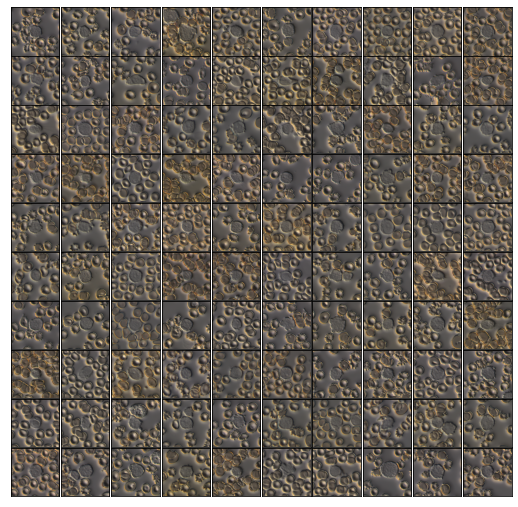

In [6]:
alcs = pd.DataFrame([])

for path in iglob(train_dir + "/**.png"):
    img=mpimg.imread(path)
    alc = pd.Series(img.flatten(),name=path)
    alcs = alcs.append(alc)
#     alcs = pd.concat(alcs, alc)

fig, axes = plt.subplots(10,10,figsize=(9,9),subplot_kw={'xticks':[], 'yticks':[]},gridspec_kw=dict(hspace=0.01, wspace=0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(alcs.iloc[i].values.reshape(360,360,3),cmap='rainbow')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

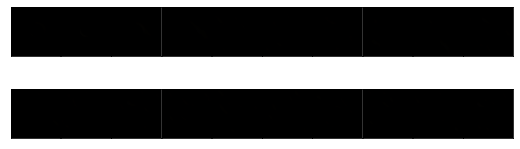

In [7]:
from sklearn.decomposition import PCA

#n_components=0.80 means it will return the Eigenvectors that have the 80% of the variation in the dataset
alcs_pca = PCA(n_components=0.8)
alcs_pca.fit(alcs)
fig, axes = plt.subplots(2,10,figsize=(9,3), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(alcs_pca.components_[i].reshape(360,360,3),cmap='rainbow')

Number of components explaining 80% variance: 510


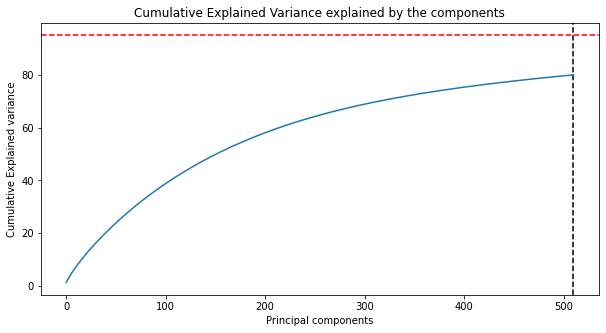

In [14]:

var_cumu = np.cumsum(alcs_pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>80)
print("Number of components explaining 80% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [ ]:
import matplotlib.image as mpimg
from sklearn.decomposition import PCA

def get_pca( label):
    
    
    folder_path ='srv/img_db/ISR_DIC/train/'
    df = pd.DataFrame([])
    
    for path in iglob(folder_path + label + '/**.png'):
        img = mpimg.imread(path)
        img_flatten = pd.Series(img.flatten(),name=path)
        df = df.append(img_flatten)
    
    df_pca = PCA(n_components=0.8)
    df_pca.fit(df)
    
    return df_pca